# P4: Dreaming Data!


## Table Of Content

1. Introduction
2. Preliminaries
3. Software setup
5. Grading rubric
6. Submission guidelines


## 1. Introduction

In this project, you will implement key components of a diffusion model and use it to generate additional synthetic data for training purposes. Diffusion models, which are a type of generative model, work by progressively denoising data that has been corrupted by Gaussian noise. These models have gained significant attention due to their ability to generate high-quality synthetic samples, making them useful in tasks where data augmentation or generation is required.

Your task will involve understanding the underlying principles of diffusion models, implementing the forward and reverse processes, and using the trained model to generate new data. This generated data will be used to augment the training dataset, improving the robustness and performance of downstream machine learning tasks. You will evaluate the effectiveness of your generated data by comparing model performance with and without the use of synthetic samples.

This project is split into 3 parts:

- Part 1. Diffusion: implementation and training
- Part 2. Data augmentation using diffusion
- Part 3. Parameter ablation studies

Please read the grading rubric and submission guidelines before starting the work.

## 2. Preliminaries

### Part 1. Diffusion: implementation and training

You will be implementing the missing pieces in `src/DiffusionFreeGuidence/DiffusionCondition.py` for this section. They include,


#### `GaussianDiffusionTrainer:__init__():`
Implement any missing variables including `betas, sqrt_alphas_bar, sqrt_one_minus_alphas_bar`.
Same convention is used in the [2020 reference paper](https://proceedings.neurips.cc/paper/2020/file/4c5bcfec8584af0d967f1ab10179ca4b-Paper.pdf) and the class slides. Implement a linear schedule for beta (variance) for the range given in `src/MainCondition.py`. Then compute the alphas, alphas_bar (using cumprod), sqrts of alpha_bar and 1-alpha_bar.

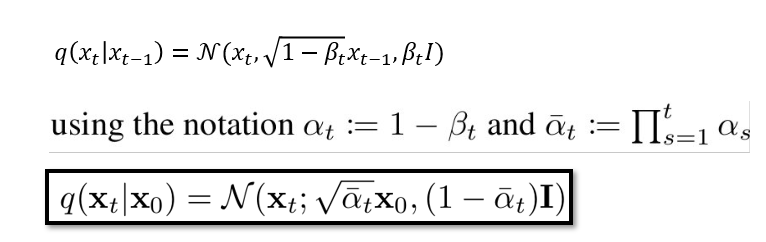


#### `GaussianDiffusionTrainer:forward():`

Use the hints in the provided code and the following diagram to implement the loss computation (MSE) for Gaussian Diffusion.

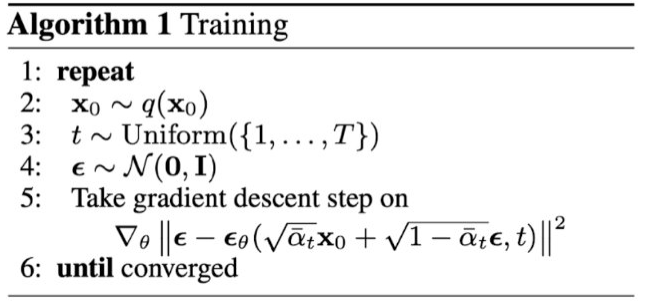


Please do not loop through the entire t count to reach $x_t$. Use this formula to directly compute $x_t$.

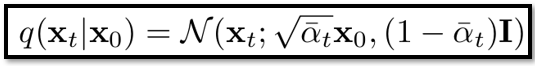

For a noise sample (taken from normal distribution), the equation would boil down to,

$x_t=\sqrt{\bar{\alpha_t}}x_0+\sqrt{(1-\bar{\alpha_t}})noise$

#### `GaussianDiffusionSampler:forward():`

Implement the algorithm given in the [paper](https://proceedings.neurips.cc/paper/2020/file/4c5bcfec8584af0d967f1ab10179ca4b-Paper.pdf).

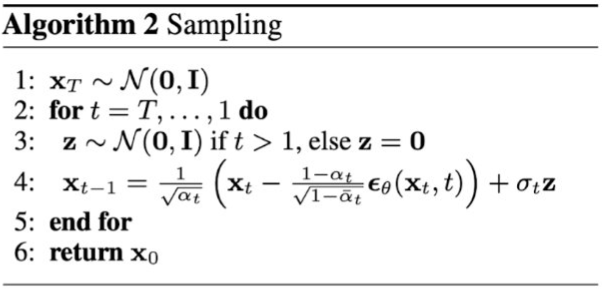

Please store any reused terms inside `__init__` in `register_buffer` to avoid recomputing.

<h3><span style="color:red">Training the network takes about two days. Please start the project early.</span>
</h3>

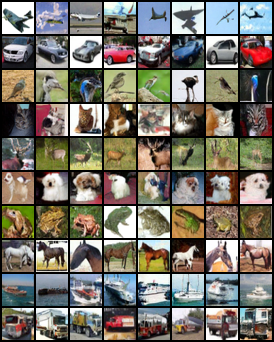

### Part 2. Data augmentation using diffusion

Since diffusion models can generate additional data for training purposes, in this section, you will augment cifar10 dataset with 5000 extra images per class (generated using the diffusion model). No starter code is provided for this section. 

You are free to use any network design you made for p1 (must use your implementation of mlp, relu, softmax layers).
The diffusion model is already conditioned with the class ids and you will be able to extract the images corresponding to a particular class. Refer to `eval()` in `TrainCondition.py` for more info.

Train with and without the augmentation and compare the accuracy and confusion matrix. **Talk about why one works better than the other.**

### Part 3. Parameter ablation studies

In this section, you will implement cosine schedule instead of linear in `GaussianDiffusionTrainer:__init__()`.

Then train the model. Highlight the performance differences clearly in your report.

Additionally, vary any parameter given in `MainCondition.py` (You don't have to re-train the network for this. Some parameter combinations can give errors, you will have to experiment with parameter combinations to see which works, the goal is to gain an intuition of parameter tuning). Compare the outputs for various paranmeters in the report. Here are some examples for badly tuned parameters:

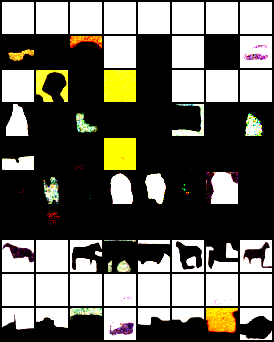



## 3. Software setup

A good set of hyper-parameters are provided in MainCondition.py in src folder. Python and Pytorch as usual. Feel free to modify the code or any of the parameters. The outputs are stored in `src/SampledImgs/` folder. 


## 4. Grading rubric

- Part 1. 40
- Part 2. 40
- Part 3. 20

- For RBE474X: Part1 + Part2 = 100% of the grade (80/80).
- For RBE595-A01-SP: You are expected to implement Part1-Part3 for getting full credits (100/100).

## 5. Submission guidelines


### Report guidelines

- For part 1, include the hyper parameters, loss function, a bunch of images generated from noise for every class. (with torch.manual_seed set to your birth date (1-31) (for any one in your team)).
- For part 2, include both the confusion matrix and accuracies for network training with and without augmentation.
- For part 3, include the hyper parameters, the images that are generated from noise using your diffusion model.

### Folder structure

Your submission on ELMS/Canvas must be a ``zip`` file, following the naming convention ``GroupGROUPNUM_p4.zip``. If your group number is ``4``, then the submission file should be named ``Group4_p4.zip``. The `GROUPNUM` can be found on Canvas. The file **must have the following directory structure**. Do not change the files to run the code. You can have any helper functions in sub-folders as you wish, be sure to index them using relative paths and if you have command line arguments for your codes, make sure to have default values too. Please provide detailed instructions on how to run your code in ``README.md`` file. 

<p style="background-color:#ddd; padding:5px">
<b>NOTE:</b> 
Furthermore, the size of your submission file should <b>NOT</b> exceed more than <b>100MB</b>.
</p>

The file tree of your submission <b>SHOULD</b> resemble this:

```
GroupGROUPNUM_p4.zip
├── src
|   └── code files (do not submit data/checkpoint/network model)
├── Report.pdf (include checkpoint model link uploaded to OneDrive here)
├── main_notebook.ipynb
└── README.md
```

Please upload any model that you had generated to onedrive and share the link in your report.

